In [1]:
import numpy as np
import pandas as pd
import os
import specutils
import matplotlib.pyplot as plt
import astropy
import astropy.units as units

import FunctionLib as F

In [2]:
DJA_Catalog_DataFrame=pd.read_csv('./DJACatalog.csv')

DJA_File_Path=os.path.expanduser('~/DJAData/')
if os.path.exists(DJA_File_Path):
    DJA_File_List=np.array(os.listdir(DJA_File_Path))
print('Number of files in DJA directory:', len(DJA_File_List))


Number of files in DJA directory: 18506


In [3]:
DJA_File_List=[f for f in os.listdir('./') if f.endswith('.fits')]
print('Number of files in current directory:', len(DJA_File_List))

Number of files in current directory: 2


In [4]:
a=F.Load_N_Rescale_Spectra(DJA_File_List[0])

Text(0.5, 1.0, '$F_{\\lambda}$')

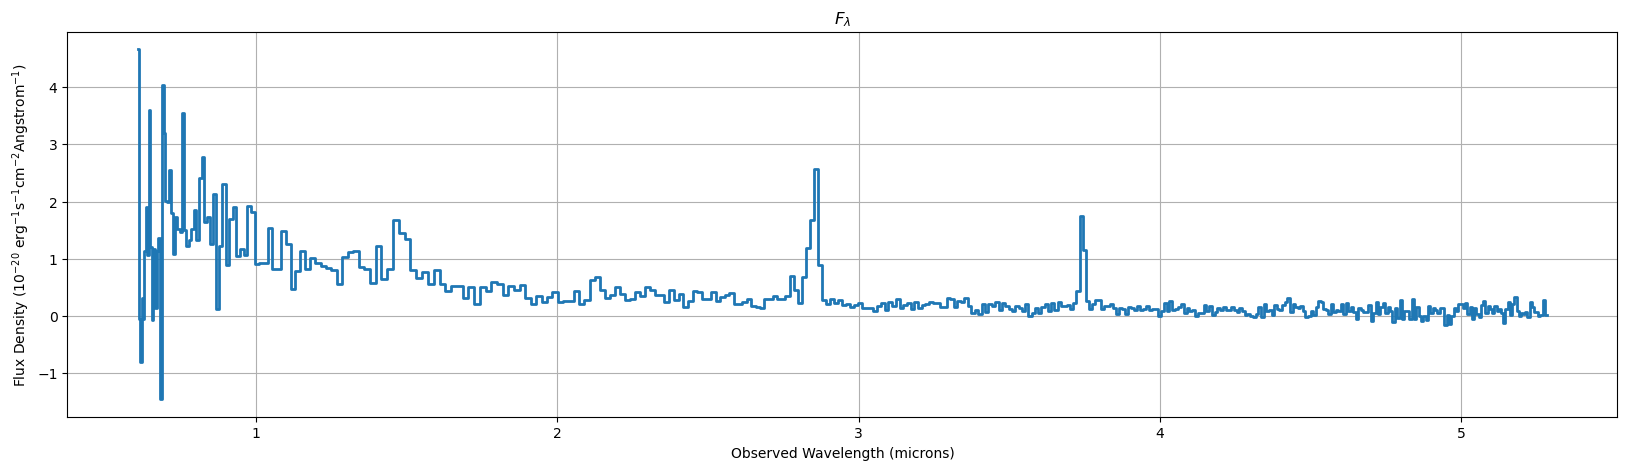

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(a.spectral_axis.value,
         a.flux.value*1e20,
         '-',drawstyle='steps-mid',linewidth=2)
plt.xlabel('Observed Wavelength (microns)')
plt.ylabel('Flux Density ($10^{-20}$ erg$^{-1}$s$^{-1}$cm$^{-2}$Angstrom$^{-1}$)')
plt.grid()
plt.title('$F_{\\lambda}$')

In [6]:
redshift=F.Load_Redshift(DJA_Catalog_DataFrame, DJA_File_List[0])
print('Redshift:', redshift)

Redshift: 4.7006


AttributeError("property 'spectral_axis' of 'Spectrum1D' object has no setter")

In [14]:
def Calibrate_Spectra_To_RestFrame(Spectrum, Redshift):
    """
    Calibrate the spectra to the rest frame using the redshift value.

    Parameters
    ----------
    Spectrum : specutils.Spectrum1D
        The Spectrum1D object containing the spectra.
    Redshift : float
        The redshift value to use for calibration.

    Returns
    -------
    specutils.Spectrum1D
        The calibrated Spectrum1D object.

    Errors
    -------
    Returns the error message if there is an issue with the calibration.
    """
    try:
        Restframe_Spectrum_Wavelength = Spectrum.spectral_axis / (1 + Redshift)
        Spectrum = specutils.Spectrum1D(
            flux=Spectrum.flux,
            spectral_axis=Restframe_Spectrum_Wavelength,
            meta=Spectrum.meta
        )
        return Spectrum
    except Exception as e:
        return e

In [15]:
restframe=Calibrate_Spectra_To_RestFrame(a, redshift)
restframe

<Spectrum1D(flux=[nan ... nan] erg / (Angstrom s cm2) (shape=(435,), mean=0.00000 erg / (Angstrom s cm2)); spectral_axis=<SpectralAxis [0.10174367 0.10239012 0.10304843 ... 0.93367359 0.93491283 0.93615024] micron> (length=435))>

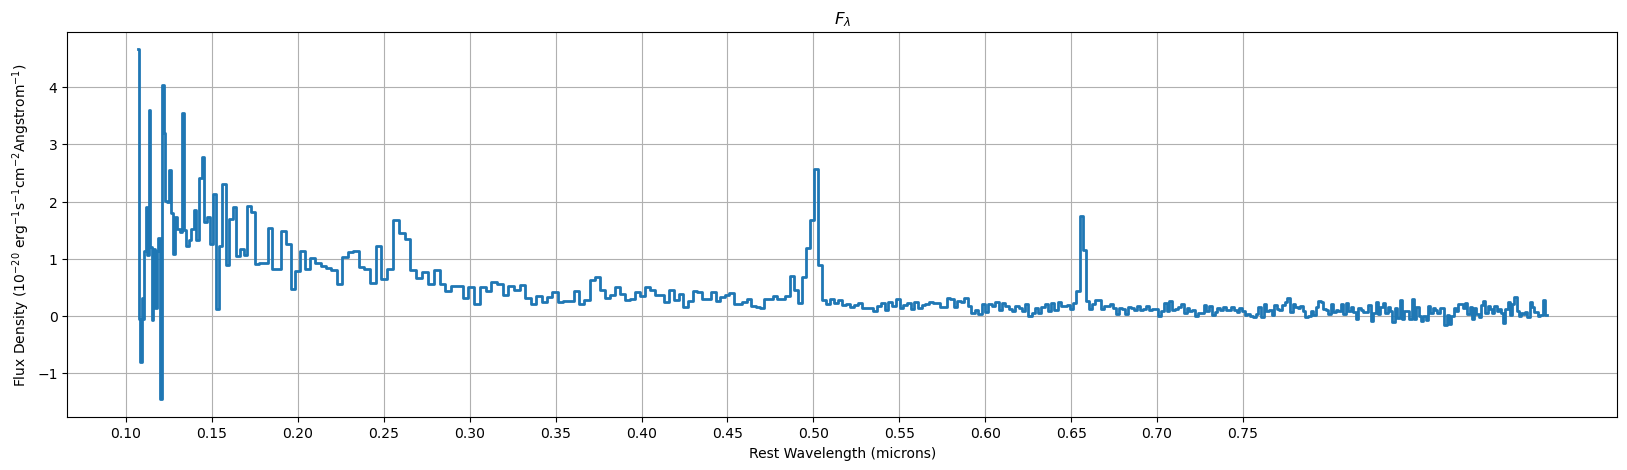

In [18]:

plt.figure(figsize=(20, 5))
plt.plot(restframe.spectral_axis.value,
         restframe.flux.value*1e20,
         '-',drawstyle='steps-mid',linewidth=2)
plt.xlabel('Rest Wavelength (microns)')
plt.ylabel('Flux Density ($10^{-20}$ erg$^{-1}$s$^{-1}$cm$^{-2}$Angstrom$^{-1}$)')
plt.grid()
plt.xticks(np.arange(0.1, 0.8, 0.05))
plt.title('$F_{\\lambda}$')
plt.show()
